In [239]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

# importing necessary libraries


##Training dataset 'Titanic_train'
##**Testing dataset 'Titanic_test' further below**

In [240]:

df = pd.read_csv('/content/Titanic_train.csv')

In [241]:
df.head(10)  # seeing first 10 entries of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [242]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#EDA

In [243]:
# missing values

In [244]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Imputation with Mean/Median: This involves replacing missing values with the average or median age of the other passengers.


In [245]:
df['Age'].fillna(df['Age'].median(), inplace=True)  # Using median

<ipython-input-245-69f2cb9167b0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Using median


In [246]:
# since ['PassengerId', 'Name', 'Ticket', 'Cabin','Fare'] this features ares are not that
# important so  we can drop them

In [247]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Fare'], axis=1)

In [248]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,28.0,1,2,S
889,1,1,male,26.0,0,0,C


##visualization


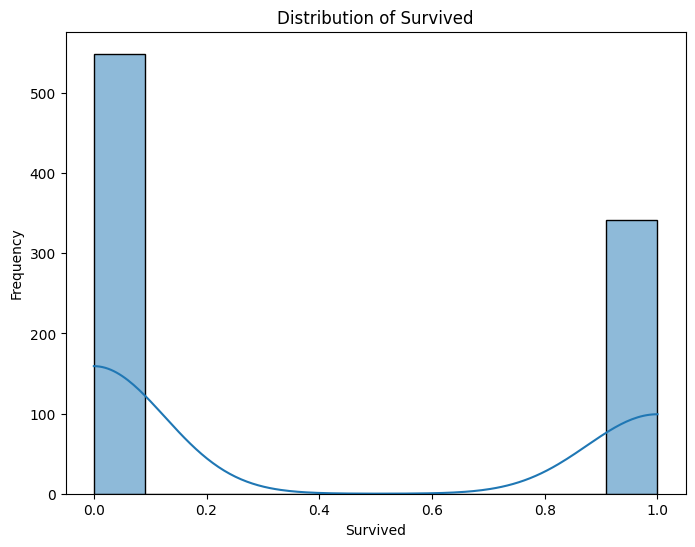

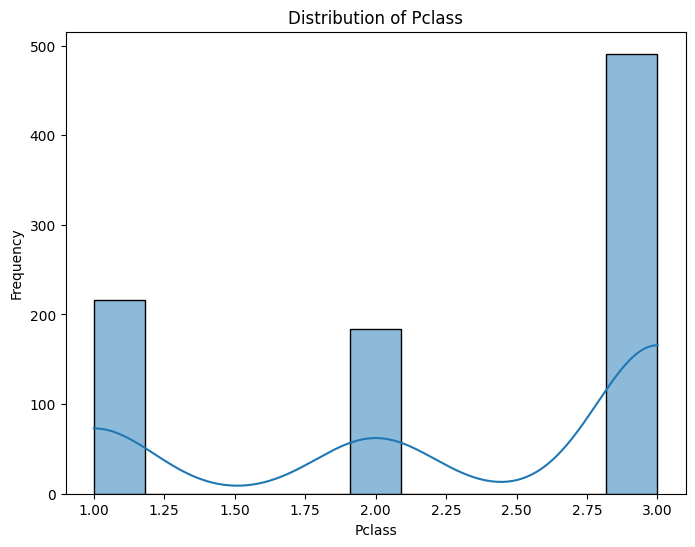

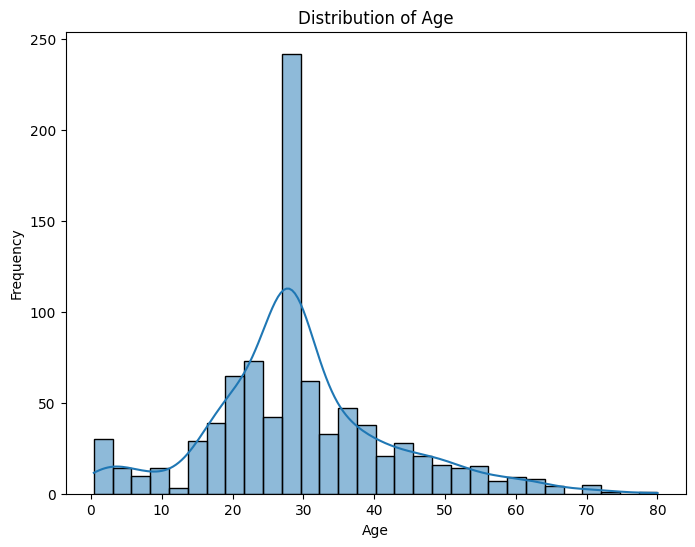

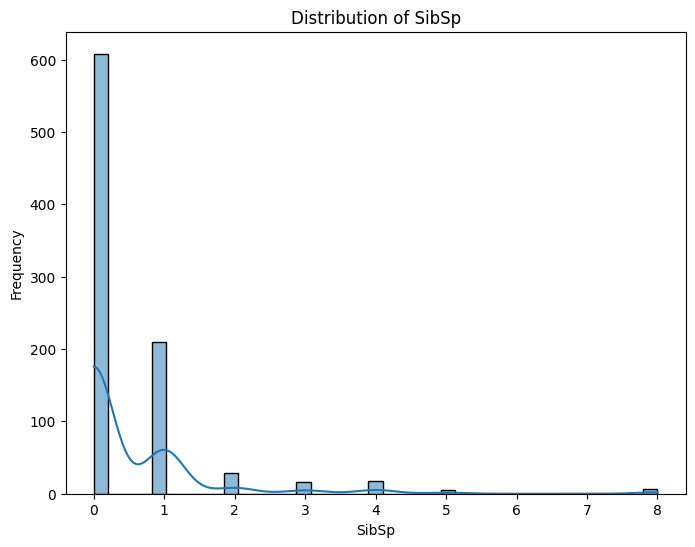

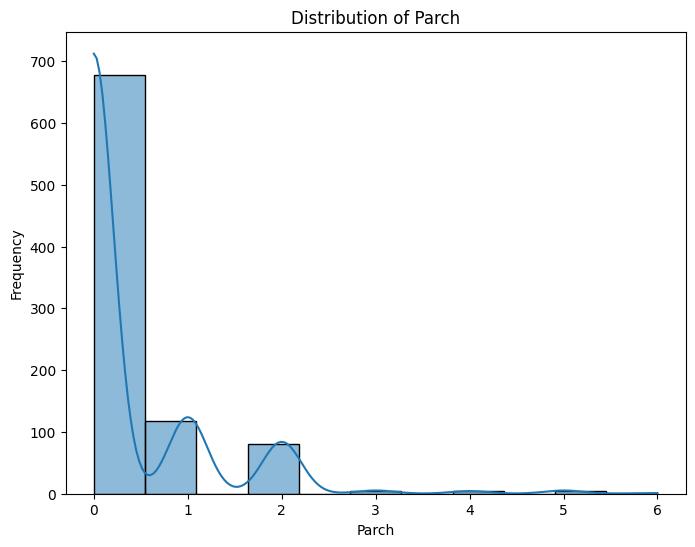

In [249]:
numerical_cols = df.select_dtypes(include=['number']).columns

# Create histograms
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [250]:
# Scatterplot

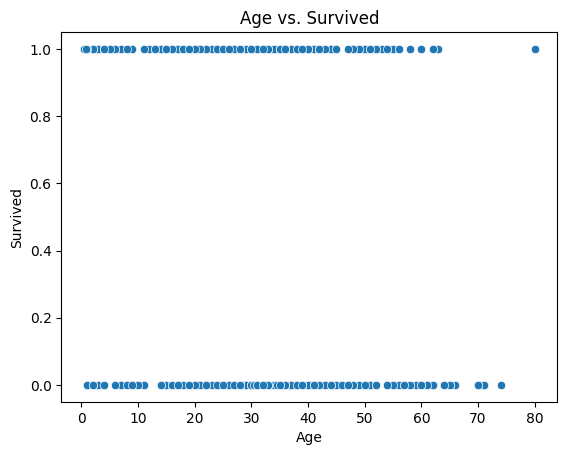

In [251]:
sns.scatterplot(x='Age', y='Survived', data=df)
plt.title('Age vs. Survived')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

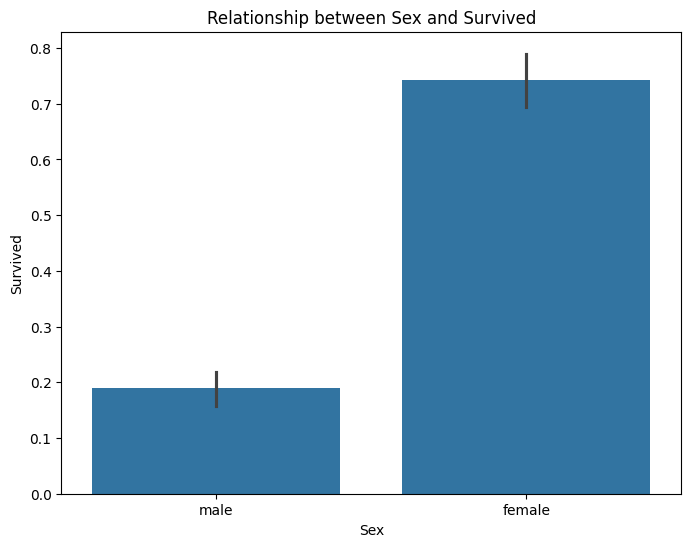

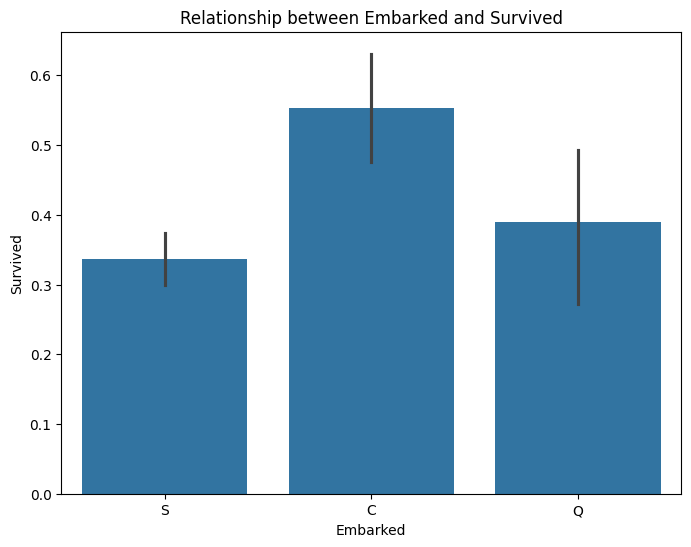

In [252]:
categorical_features = [ 'Sex', 'Embarked']
target_variable = 'Survived'

# Create bar plots
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature, y=target_variable, data=df)
    plt.title(f'Relationship between {feature} and {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.show()

# Data Preprocessing

In [253]:
encoded_df = pd.get_dummies(df, columns = categorical_features,dtype=int)
df = encoded_df

In [254]:
df

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,0,1,0,0,1
887,1,1,19.0,0,0,1,0,0,0,1
888,0,3,28.0,1,2,1,0,0,0,1
889,1,1,26.0,0,0,0,1,1,0,0


#Building Predictive Models:

In [255]:
# splittng dataseet into training and testing

In [256]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [257]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to print evaluation metrics
def print_metrics(y_true, y_pred):
    print(f'Accuracy: {accuracy_score(y_true, y_pred):.4f}')
    print(f'Precision: {precision_score(y_true, y_pred):.4f}')
    print(f'Recall: {recall_score(y_true, y_pred):.4f}')
    print(f'F1-Score: {f1_score(y_true, y_pred):.4f}')


In [258]:
# Importing the libraries for LightGBM and XGBoost
import lightgbm as lgb
import xgboost as xgb

# Create and train the LightGBM model
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train, y_train)

# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [259]:
# Make predictions
lgbm_preds = lgbm_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Print evaluation metrics for both models
print("LightGBM Model Evaluation:")
print_metrics(y_test, lgbm_preds)

print("\nXGBoost Model Evaluation:")
print_metrics(y_test, xgb_preds)


LightGBM Model Evaluation:
Accuracy: 0.8268
Precision: 0.8116
Recall: 0.7568
F1-Score: 0.7832

XGBoost Model Evaluation:
Accuracy: 0.8324
Precision: 0.8438
Recall: 0.7297
F1-Score: 0.7826


In [260]:
from sklearn.model_selection import cross_val_score

# Cross-validation for LightGBM
lgbm_cv_scores = cross_val_score(lgbm_model, X, y, cv=5)
print(f'LightGBM Cross-validation scores: {lgbm_cv_scores.mean():.4f}')

# Cross-validation for XGBoost
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5)
print(f'XGBoost Cross-validation scores: {xgb_cv_scores.mean():.4f}')



[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [261]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for LightGBM
lgbm_param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [20, 50, 100],
    'max_depth': [5, 10, 15]
}

# Initialize GridSearchCV for LightGBM
grid_search_lgbm = GridSearchCV(estimator=lgb.LGBMClassifier(), param_grid=lgbm_param_grid,
                                cv=3, verbose=1, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV to find the best parameters
grid_search_lgbm.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Hyperparameters for LightGBM:", grid_search_lgbm.best_params_)
print("Best Accuracy from GridSearchCV:", grid_search_lgbm.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [262]:
# Hyperparameter grid for XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 200],

}

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=xgb_param_grid,
                               cv=3, verbose=1, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV to find the best parameters
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Hyperparameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Accuracy from GridSearchCV:", grid_search_xgb.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Accuracy from GridSearchCV: 0.828658889716224


##Testing dataset 'Titanic_test'

In [263]:
test_df = pd.read_csv('/content/Titanic_test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [264]:
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Fare'], axis=1)
encoded_test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], dtype=int)
test_df = encoded_test_df

<ipython-input-264-c45a6610c735>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].median(), inplace=True)


In [265]:
# model predictions
lgbm_predictions = lgbm_model.predict(test_df)
xgb_predictions = xgb_model.predict(test_df)


In [266]:
print("LightGBM Predictions:")
print(lgbm_predictions)

print("\nXGBoost Predictions:")
print(xgb_predictions)   # predictions

LightGBM Predictions:
[0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0
 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1
 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1
 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 1 1 0 1 0]

XGBoost Predictions:
[0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1

#Comparative Analysis:

In [267]:
comparison_df = pd.DataFrame({'LightGBM': lgbm_predictions, 'XGBoost': xgb_predictions})

In [268]:
different_predictions = comparison_df[comparison_df['LightGBM'] != comparison_df['XGBoost']]
print("Different Predictions:")
different_predictions   #creating a dataframe for comparision

Different Predictions:


,LightGBM,XGBoost
18,1,0
47,0,1
49,0,1
61,1,0
72,1,0
75,1,0
82,0,1
87,0,1
90,0,1
92,1,0


In [269]:
comparison_df = pd.DataFrame({'LightGBM': lgbm_predictions, 'XGBoost': xgb_predictions})
agreement_percentage = (comparison_df['LightGBM'] == comparison_df['XGBoost']).mean() * 100
print(f"Agreement Percentage: {agreement_percentage:.2f}%")

# A high percentage suggests good agreement and potentially robust predictions.

Agreement Percentage: 91.87%


In [270]:
# Examine frequency of each predictioj class
print("LightGBM Predictions Frequency:")
print(pd.Series(lgbm_predictions).value_counts(normalize=True))

print("\nXGBoost Predictions Frequency:")
print(pd.Series(xgb_predictions).value_counts(normalize=True))

LightGBM Predictions Frequency:
0    0.5311
1    0.4689
Name: proportion, dtype: float64

XGBoost Predictions Frequency:
0    0.511962
1    0.488038
Name: proportion, dtype: float64


#visual comparision:


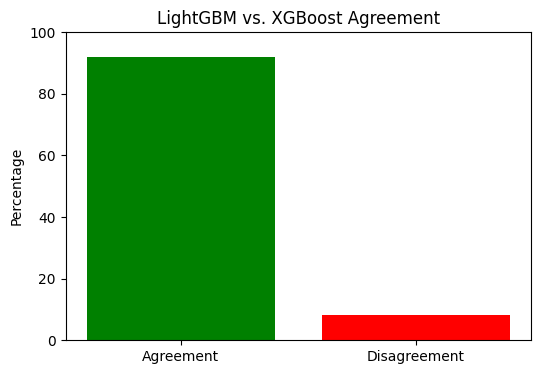

In [271]:
import matplotlib.pyplot as plt

agreement_percentage = (comparison_df['LightGBM'] == comparison_df['XGBoost']).mean() * 100

plt.figure(figsize=(6, 4))
plt.bar(['Agreement'], [agreement_percentage], color='green')
plt.bar(['Disagreement'], [100 - agreement_percentage], color='red')
plt.title('LightGBM vs. XGBoost Agreement')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.show()

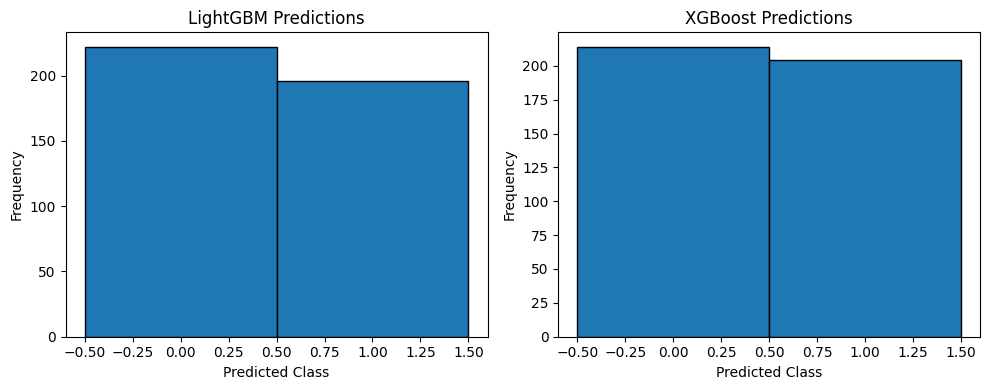

In [272]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(lgbm_predictions, bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.title('LightGBM Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(xgb_predictions, bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.title('XGBoost Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

LightGBM and XGBoost demonstrated good agreement and predictive capabilities on the Titanic dataset. While subtle differences in predictions highlight potential individual strengths and weaknesses, their overall consistency suggests a robust modeling approach. Ensembling or further data exploration could enhance accuracy. Kaggle submission or access to ground truth labels would provide a definitive performance evaluation.